# **Klasifikasi Dua Kelas**

Dataset : https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [ ]:
# import library
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
# install the Kaggle API client
! pip install -q kaggle

In [ ]:
# Unggah file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"indratriyadi","key":"220b680a6b9e15e50dd0a4cf76ffbf9a"}'}

In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset
!kaggle datasets download -d yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 26.4MB/s]


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os

local_zip = '/content/breast-cancer-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
df = pd.read_csv('/tmp/breast-cancer.csv')

In [ ]:
# Untuk melihat overview dari dataset kita bisa memanggil fungsi info() pada dataframe. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Label dari dataset adalah kolom pertama yang berisi string m dan b. 

In [ ]:
#mengapus kolom id
del df['id']

KeyError: ignored

In [ ]:
# mengubah nilai-nilai pada kolom name menjadi bilangan numerik
df.diagnosis[df.diagnosis == 'M'] = 0
df.diagnosis[df.diagnosis == 'B'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Untuk nilai yang berisi string M akan diubah menjadi 0 dan nilai yang berisi string B akan diubah menjadi 1.

Dataset harus dalam bentuk array agar dapat diproses oleh model.

 Values mengembalikan numpy array yang dikonversi dari dataframe.

In [ ]:
dataset = df.values

In [ ]:
# mengakses objek dataset yang menampung array
dataset

array([[0, 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       [0, 20.57, 17.77, ..., 0.186, 0.275, 0.08902],
       [0, 19.69, 21.25, ..., 0.243, 0.3613, 0.08758],
       ...,
       [0, 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       [0, 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       [1, 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

## **Memisahkan antara atribut dan label pada dataset**

In [ ]:
# pilih 5 kolom terakhir sebagai atribut
X = dataset[:,1:31]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

In [ ]:
# pilih kolom pertama sebagai label
y = dataset[:,0]

## **Normalization**

Menggunakan fungsi fit_transform() dari sebuah objek MinMaxScaler dari library preprocessing SKLearn untuk menormalisasi data kita

In [ ]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## **Split Data**

Memisahkan data menjadi data latih dan data uji untuk mengevaluasi kinerja model

In [ ]:
# pisahkan data training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Dataset telah dipisahkan ke dalam training dan test set.  Karena tadi kita mengubah nilai-nilai pada kolom name menjadi bilangan numerik, yang artinya kita mengubah label menjadi tipe data boolean, maka kita perlu mengubah tipe data tersebut menjadi float32.

In [ ]:
import numpy as np
# Mengubah tipe data menjadi float32
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

## **Modeling**

In [ ]:
# Memanggil fungsi tf.keras.Sequential()
from keras.models import Sequential
from keras.layers import Dense

Sequential adalah model JST yang paling sederhana dan telah kita pelajari sebelumnya. Pada model sequential, setiap layer pada jaringan saraf tiruan terhubung secara sekuensial, sesuai namanya. 

Pada model sequential ini, kita kemudian isi layer yang kita inginkan untuk model kita. Untuk membuat sebuah layer, kita dapat menggunakan fungsi keras.layers.Dense().



```
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=8),
                             keras.layers.Dense(units=1)])
```



Parameter units dari fungsi keras.layers.Dense() adalah jumlah perseptron yang dimiliki oleh layer tersebut. Yang perlu diperhatikan pada model sequential adalah, layer pertama dari model tersebut haruslah memiliki parameter input_shape agar model bisa mengenali bentuk input yang akan diprosesnya.
Parameter input_shape menunjukkan bentuk dari setiap elemen input yang akan diterima oleh model. Pada kasus kita setiap elemen dari data kita adalah sebuah bilangan numerik 1 digit, sehingga kita bisa isi input_shape kita dengan angka 1. Jika sebuah elemen dari dataset kita berupa gambar yang memiliki dimensi 32*32 piksel, maka input_shape yang sesuai adalah [32,32].

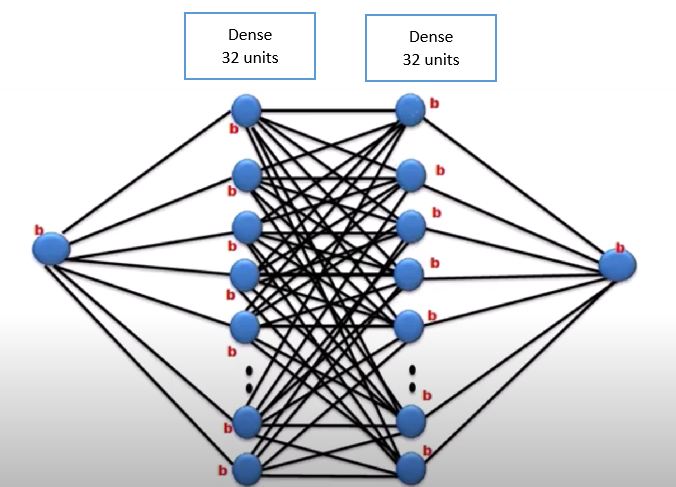

In [ ]:
model = Sequential([    
                    Dense(32, activation='relu', input_shape=(30,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                992       
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


Untuk model yang kita kembangkan adalah model sequential yang memiliki 3 buah layer. Activation function pada 2 layer pertama yang dapat digunakan adalah RELU. Untuk layer terakhir, isi parameter unit isi dengan 1 di mana output dari jst kita merupakan satu buah bilangan numerik. 

Activation function pada layer terakhir dipilih sigmoid karena sigmoid memetakan probabilitas dari 0 sampai 1. Sigmoid sangat cocok digunakan pada masalah klasifikasi biner.

### **Relu**

RELU atau Rectified Linear Activation Unit merupakan fungsi aktivasi linear untuk jaringan saraf tiruan. Ia telah menjadi fungsi aktivasi default karena model yang menggunakannya mencapai kinerja lebih baik dengan cepat.

Ingatlah, fungsi aktivasi digunakan untuk memetakan hasil penjumlahan antara bobot dengan masukan (disebut sebagai weighted sum) menjadi nilai tertentu. Fungsi ini memungkinkan perceptron dapat menyesuaikan pola untuk data non linear.

Nah, jika weighted sum ini bernilai positif, RELU akan mengembalikan nilainya secara langsung. Sebaliknya, jika nilainya negatif, RELU akan menghasilkan nilai nol. 

Fungsi aktivasi dengan aturan berikut:

- Jika input negatif atau nol, output adalah 0.
- Jika input positif, output sama dengan input.

RELU didefinisikan sebagai:

f(x) = max(0, x), dengan x adalah jaringan saraf masukan (weighted sum).

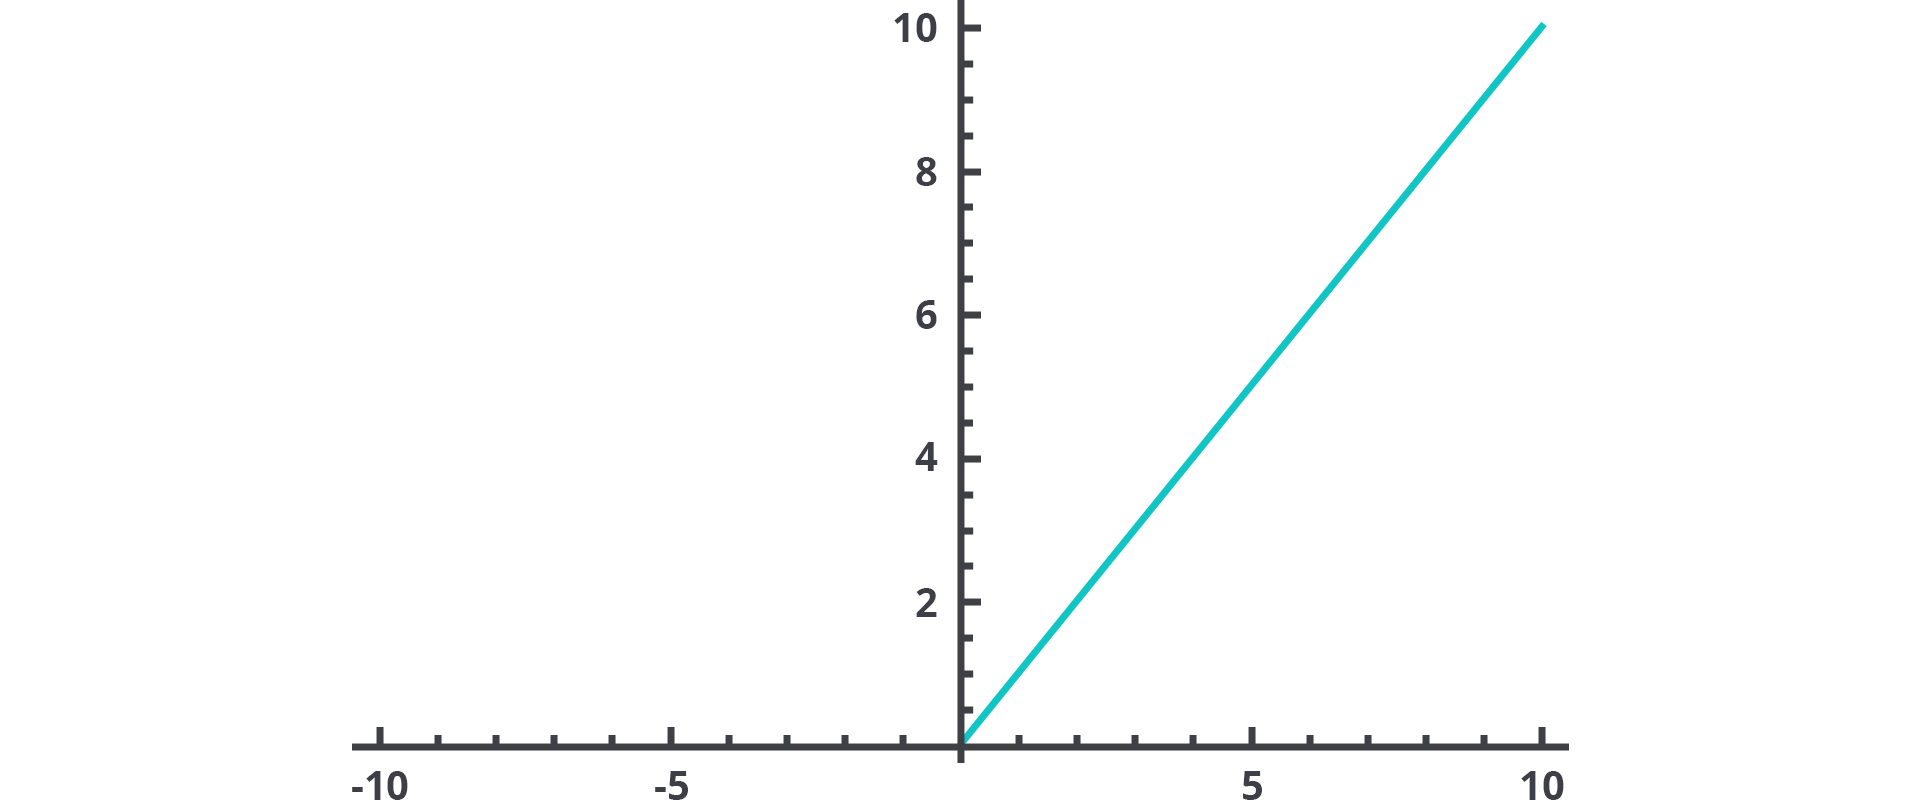

### **Sigmoid**

Fungsi yang memetakan output regresi logistik atau multinomial ke probabilitas, mengembalikan nilai antara 0 dan 1. Fungsi sigmoid memiliki rumus berikut:




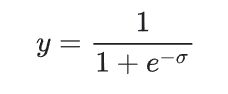

Dengan kata lain, fungsi sigmoid diubah menjadi probabilitas antara 0 dan 1.

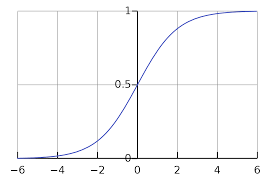

Kemudian, hal yang paling penting selanjutnya adalah menentukan optimizer dan loss dari model agar model kita bisa belajar. Untuk menentukan optimizer dan loss kita gunakan fungsi compile. 

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Optimizer : stochastic gradient descent (sgd), yang merupakan optimizer yang sangat umum dan cocok dipakai pada dataset yang berukuran kecil. Loss yang sesuai adalah ‘binary_crossentropy’ karena masalah pada latihan kita kali ini adalah masalah 2 kelas (biner). 

**Gradient Descent**  
Sebuah teknik untuk meminimalkan kerugian dengan menghitung gradien kerugian sehubungan dengan parameter model, dikondisikan pada data pelatihan. Secara informal, penurunan gradien secara iteratif menyesuaikan parameter, secara bertahap menemukan kombinasi bobot dan bias terbaik untuk meminimalkan kerugian.

**Loss**   
Ukuran seberapa jauh prediksi model dari labelnya. Atau, dengan ungkapan yang lebih pesimistis, ukuran seberapa buruk modelnya. Untuk menentukan nilai ini, model harus mendefinisikan fungsi kerugian. 

**Accuracy**  
Akurasi adalah salah satu metrik untuk mengevaluasi model klasifikasi. Akurasi adalah sebagian kecil dari prediksi model yang benar.

## **Training Model**

Fungsi fit() adalah fungsi di mana kita menyuruh model kita untuk mempelajari hubungan antara atribut dan label pada dataset. Selain atribut dan label, Parameter lain yang diperlukan sebuah model keras pada fit adalah epochs. Epochs adalah berapa kali sebuah JST harus belajar memperbaiki akurasinya.

In [ ]:
hist = model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.9271
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.9271
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.9271
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.9296
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.9347
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.9271
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.9397
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.9296
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.9322
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.9372
Epoch 11/50
13/13 [

In [ ]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

6/6 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9591


[0.18064068257808685, 0.9590643048286438]

Untuk melihat loss dan akurasi model pada data test, gunakan fungsi evaluate pada model. Fungsi Evaluate mengembalikan 2 nilai. Yang pertama adalah nilai loss, dan yang kedua adalah nilai akurasinya.